In [1]:
#1A: show statistics(mean,std,...) for each feature using groupby, make barplots to show distribution
#1B: 1.impute missing values using mean value 2.impute missing values as 0
#1C: re-format the data into patient, time, mood, activity, call..., aggregate by 5-day windows to generate instances for training

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler

In [125]:
rawdata=pd.read_csv("dataset_mood_smartphone.csv")

In [126]:
base_folder = f"plots/"
os.makedirs(base_folder, exist_ok=True)

In [129]:
rawdata

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.000
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.000
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.000
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.000
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.000
...,...,...,...,...,...
376907,2770399,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032
376908,2772465,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008
376909,2774026,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026
376910,2774133,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033


In [135]:
rawdata=rawdata.drop('Unnamed: 0',axis=1)

In [7]:
rawdata

,id,time,variable,value
0,AS14.01,2014-02-26 13:00:00.000,mood,6.000
1,AS14.01,2014-02-26 15:00:00.000,mood,6.000
2,AS14.01,2014-02-26 18:00:00.000,mood,6.000
3,AS14.01,2014-02-26 21:00:00.000,mood,7.000
4,AS14.01,2014-02-27 09:00:00.000,mood,6.000
...,...,...,...,...
376907,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032
376908,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008
376909,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026
376910,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033


In [8]:
rawdata.groupby('variable')['value'].mean().round(2)

variable
activity                  0.12
appCat.builtin           18.54
appCat.communication     43.34
appCat.entertainment     37.58
appCat.finance           21.76
appCat.game             128.39
appCat.office            22.58
appCat.other             25.81
appCat.social            72.40
appCat.travel            45.73
appCat.unknown           45.55
appCat.utilities         18.54
appCat.weather           20.15
call                      1.00
circumplex.arousal       -0.10
circumplex.valence        0.69
mood                      6.99
screen                   75.34
sms                       1.00
Name: value, dtype: float64

In [9]:
rawdata.groupby('variable')['value'].std().round(2)

variable
activity                  0.19
appCat.builtin          415.99
appCat.communication    128.91
appCat.entertainment    262.96
appCat.finance           39.22
appCat.game             327.15
appCat.office           449.60
appCat.other            112.78
appCat.social           261.55
appCat.travel           246.11
appCat.unknown          119.40
appCat.utilities         60.96
appCat.weather           24.94
call                      0.00
circumplex.arousal        1.05
circumplex.valence        0.67
mood                      1.03
screen                  253.82
sms                       0.00
Name: value, dtype: float64

In [43]:
rawdata.groupby('variable')['value'].median().round(2)

variable
activity                 0.02
appCat.builtin           4.04
appCat.communication    16.23
appCat.entertainment     3.39
appCat.finance           8.03
appCat.game             43.17
appCat.office            3.11
appCat.other            10.03
appCat.social           28.47
appCat.travel           18.14
appCat.unknown          17.19
appCat.utilities         8.03
appCat.weather          15.12
call                     1.00
circumplex.arousal       0.00
circumplex.valence       1.00
mood                     7.00
screen                  20.04
sms                      1.00
Name: value, dtype: float64

In [10]:
rawdata.groupby('variable')['value'].max().round(2)

variable
activity                    1.00
appCat.builtin          33960.25
appCat.communication     9830.78
appCat.entertainment    32148.68
appCat.finance            355.51
appCat.game              5491.79
appCat.office           32708.82
appCat.other             3892.04
appCat.social           30000.91
appCat.travel           10452.62
appCat.unknown           2239.94
appCat.utilities         1802.65
appCat.weather            344.86
call                        1.00
circumplex.arousal          2.00
circumplex.valence          2.00
mood                       10.00
screen                   9867.01
sms                         1.00
Name: value, dtype: float64

In [11]:
rawdata.groupby('variable')['value'].min().round(2)

variable
activity                    0.00
appCat.builtin         -82798.87
appCat.communication        0.01
appCat.entertainment       -0.01
appCat.finance              0.13
appCat.game                 1.00
appCat.office               0.00
appCat.other                0.01
appCat.social               0.09
appCat.travel               0.08
appCat.unknown              0.11
appCat.utilities            0.25
appCat.weather              1.00
call                        1.00
circumplex.arousal         -2.00
circumplex.valence         -2.00
mood                        1.00
screen                      0.04
sms                         1.00
Name: value, dtype: float64

In [12]:
id_to_remove = 'AS14.07'
rawdata_filtered = rawdata[rawdata['id'] != id_to_remove]

In [13]:
#choose a VARIABLE to make boxplot per sample
selected_variable = 'mood' 

filtered_data = rawdata[rawdata['variable'] == selected_variable]

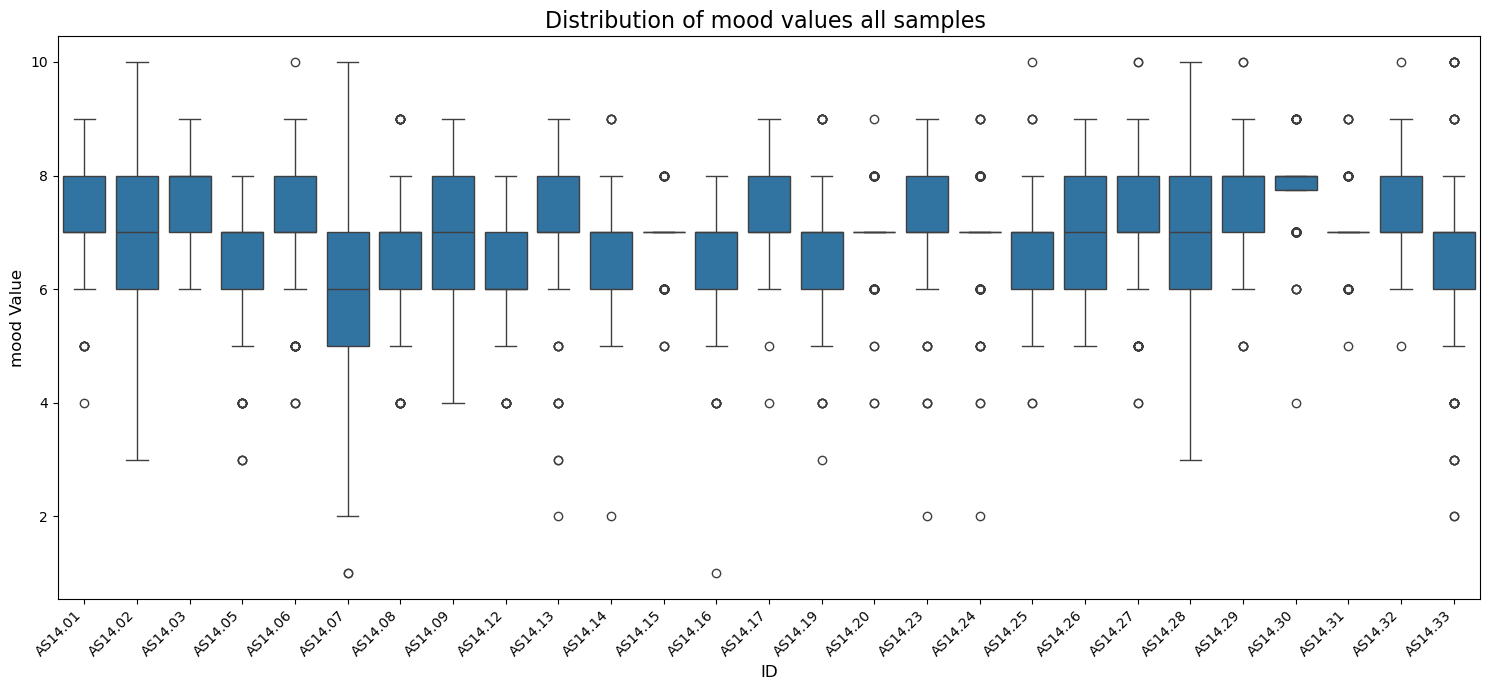

In [14]:
# plot the selected VARIABLE
plt.figure(figsize=(15, 7)) 
sns.boxplot(x='id', y='value', data=filtered_data)
plt.title(f'Distribution of {selected_variable} values all samples ', fontsize=16)
plt.xlabel('ID', fontsize=12)
plt.ylabel(f'{selected_variable} Value', fontsize=12) 
plt.xticks(rotation=45, ha='right') 

plt.tight_layout()
plt.savefig(os.path.join(base_folder, "Distribution values mood per Sample.png"))

plt.show()

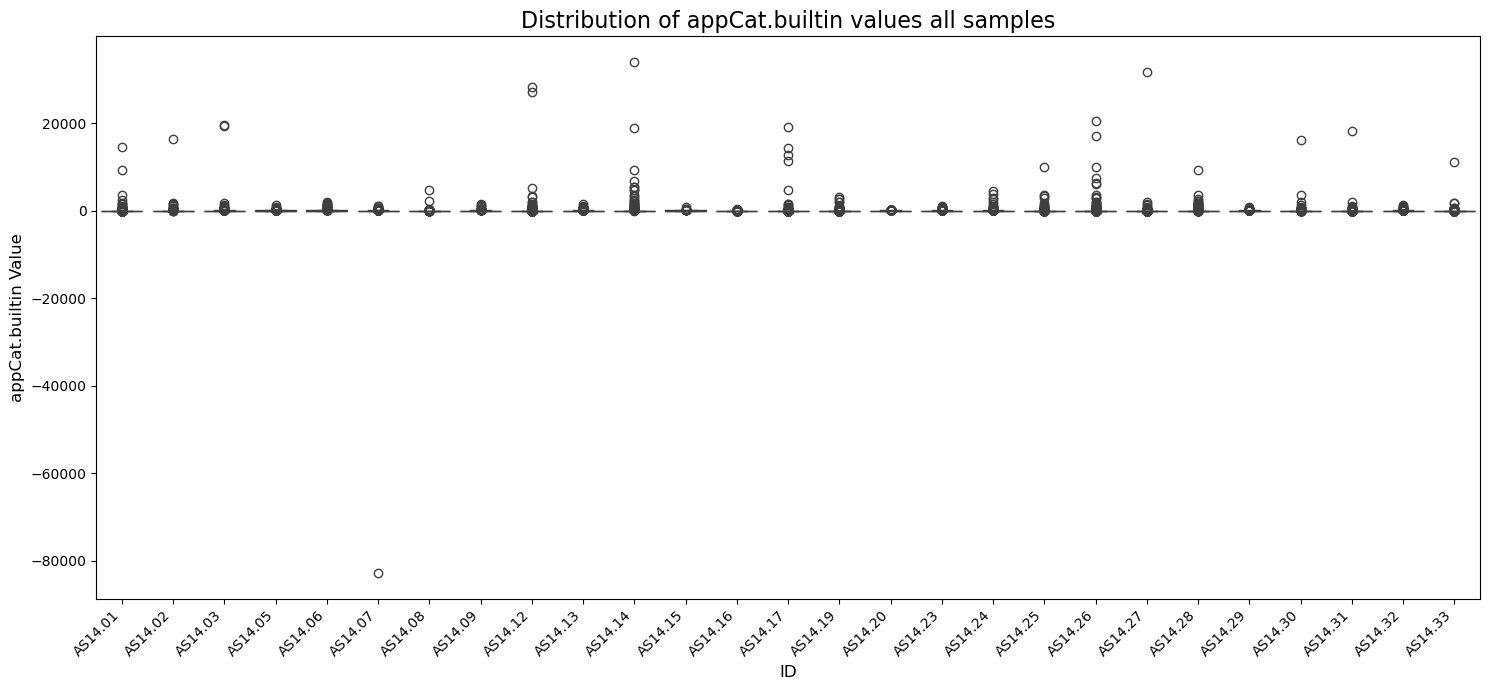

In [15]:

# plot the selected VARIABLE --> appCat.builtin
selected_variable = 'appCat.builtin' 
filtered_data = rawdata[rawdata['variable'] == selected_variable]

plt.figure(figsize=(15, 7)) 
sns.boxplot(x='id', y='value', data=filtered_data)
plt.title(f'Distribution of {selected_variable} values all samples', fontsize=16)
plt.xlabel('ID', fontsize=12)
plt.ylabel(f'{selected_variable} Value', fontsize=12) 
plt.xticks(rotation=45, ha='right') 

plt.tight_layout()
#plt.savefig(os.path.join(base_folder, "Distribution values appCat.builtin per Sample.png"))
plt.show()

In [16]:

print("Count the number of timtes that appCat.entertainment is negative and group bu ID")

grouped_df = rawdata[(rawdata['variable'] == 'appCat.entertainment') & (rawdata['value'] < 0)].groupby('id')
counts_by_id = grouped_df.size()
values_by_id = grouped_df['value'].apply(list)  # Get the actual values


for id, count in counts_by_id.items():
    print(f"ID {id}: Count = {count}, Values = {values_by_id[id]}")

Count the number of timtes that appCat.entertainment is negative and group bu ID
ID AS14.02: Count = 1, Values = [-0.011]


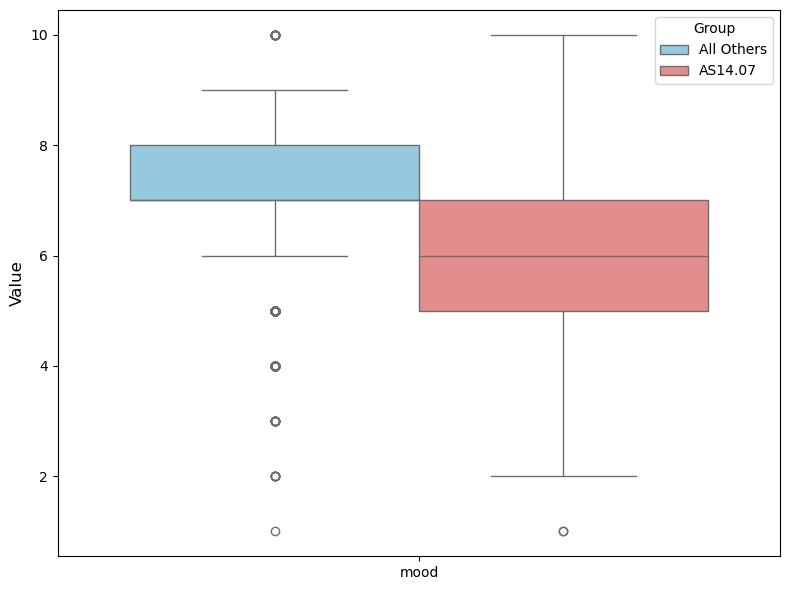

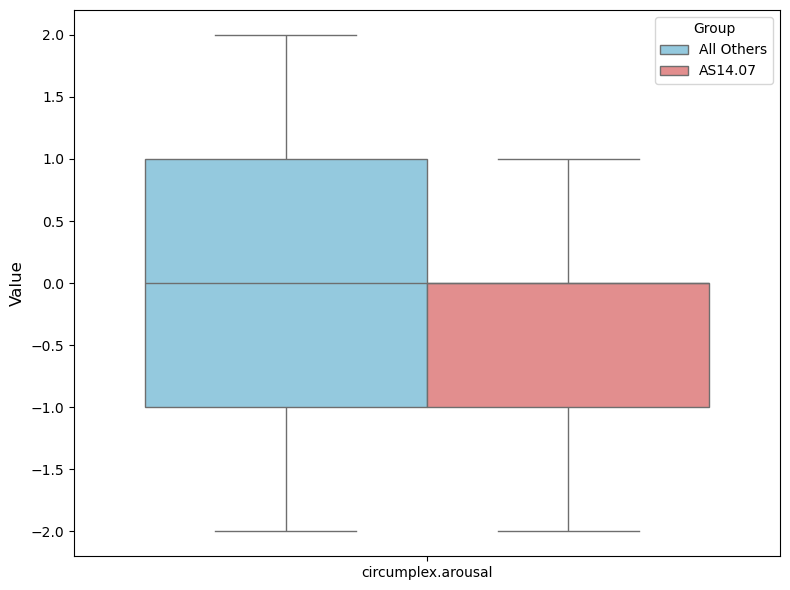

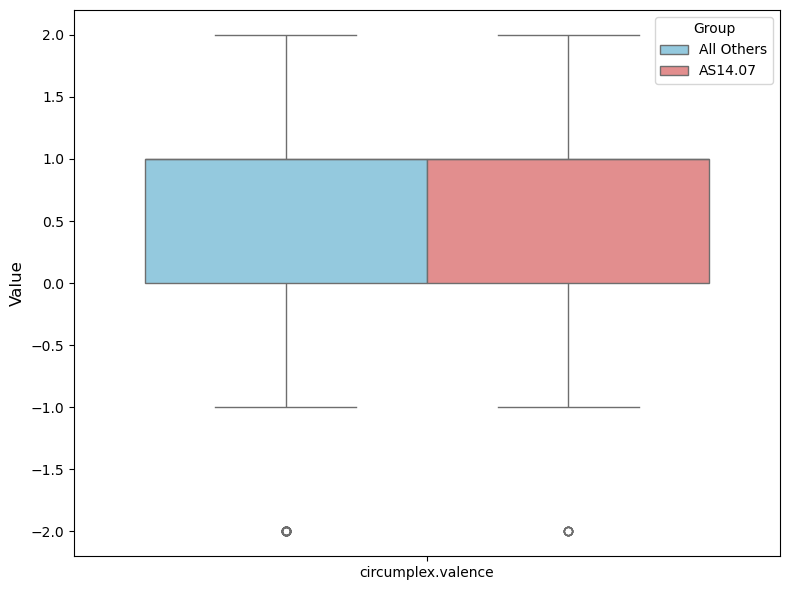

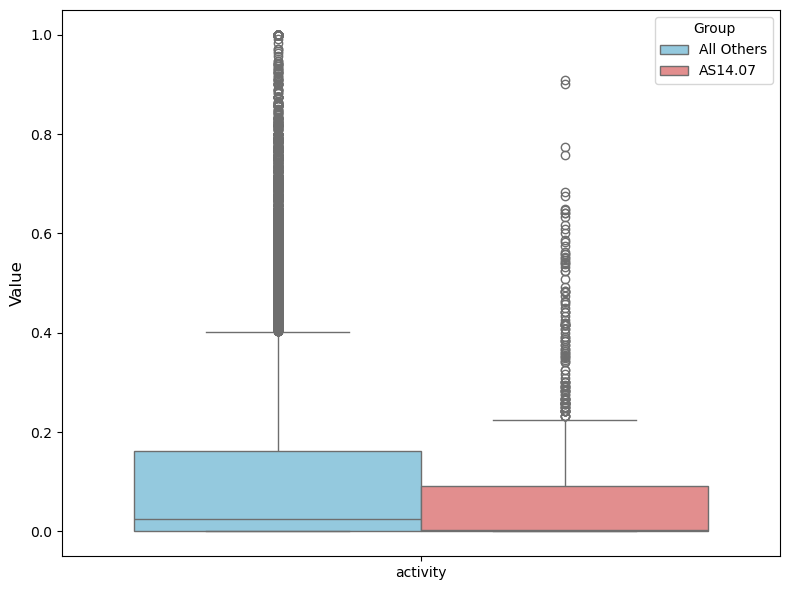

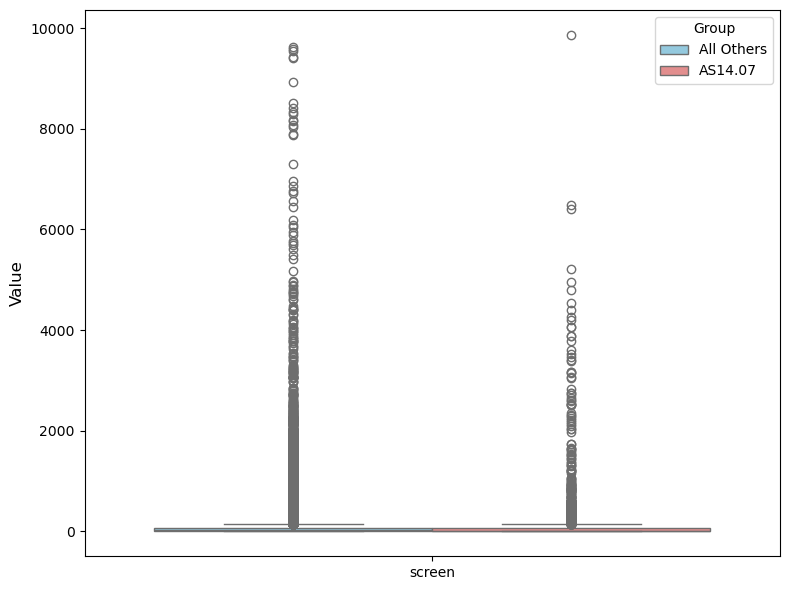

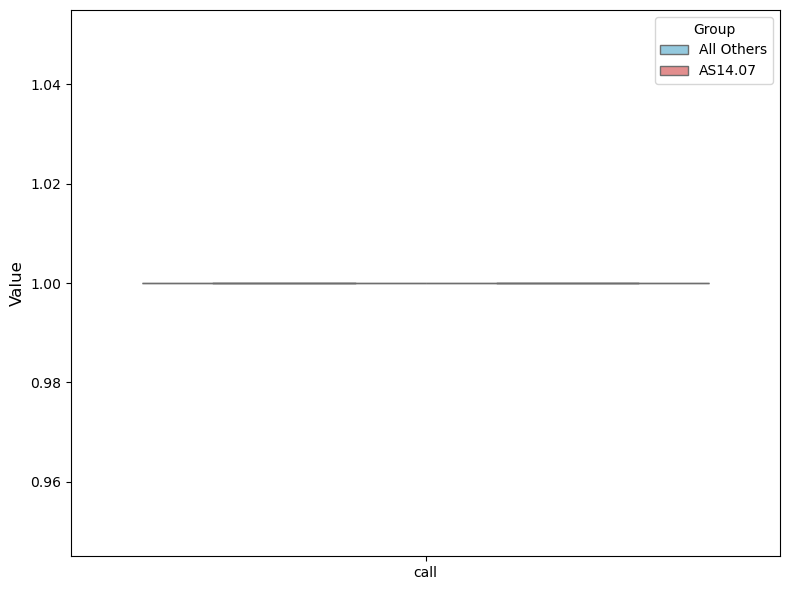

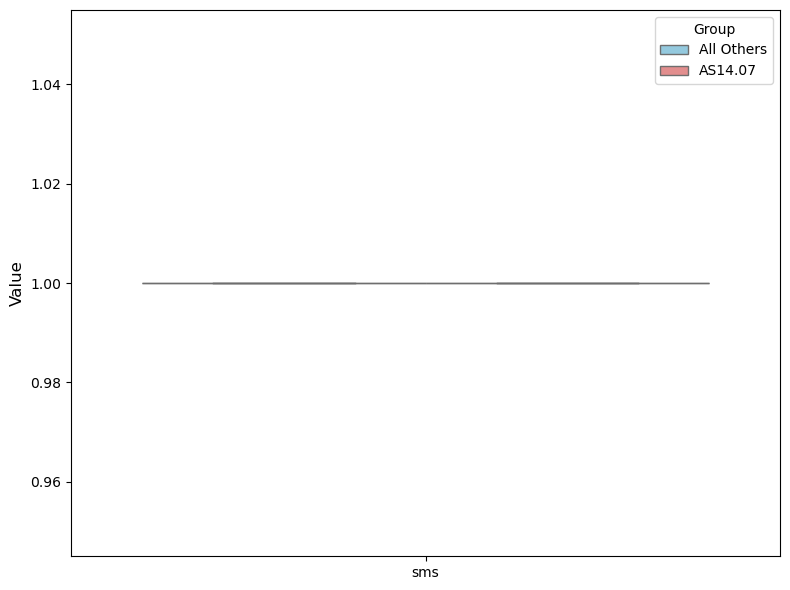

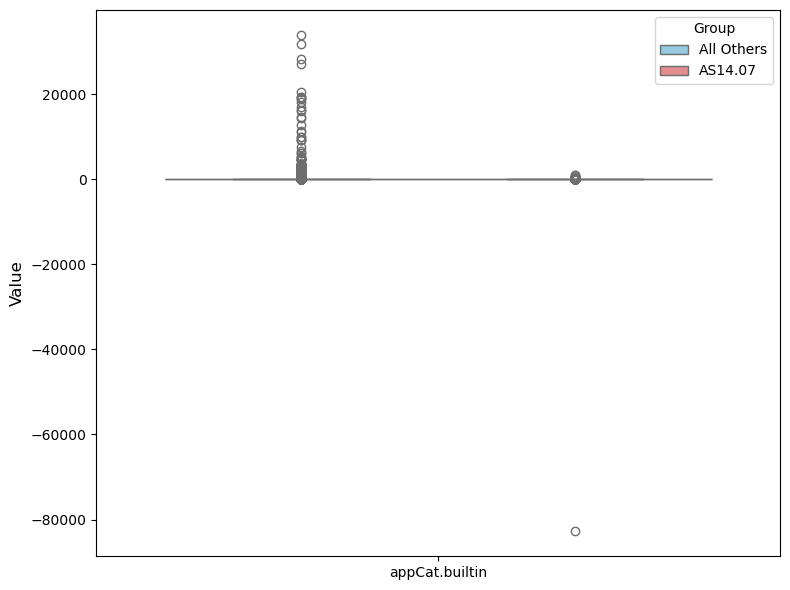

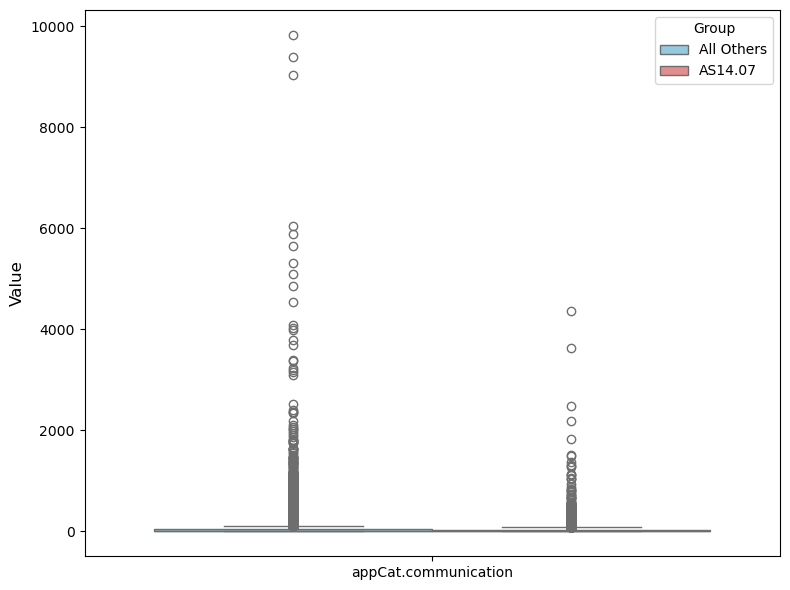

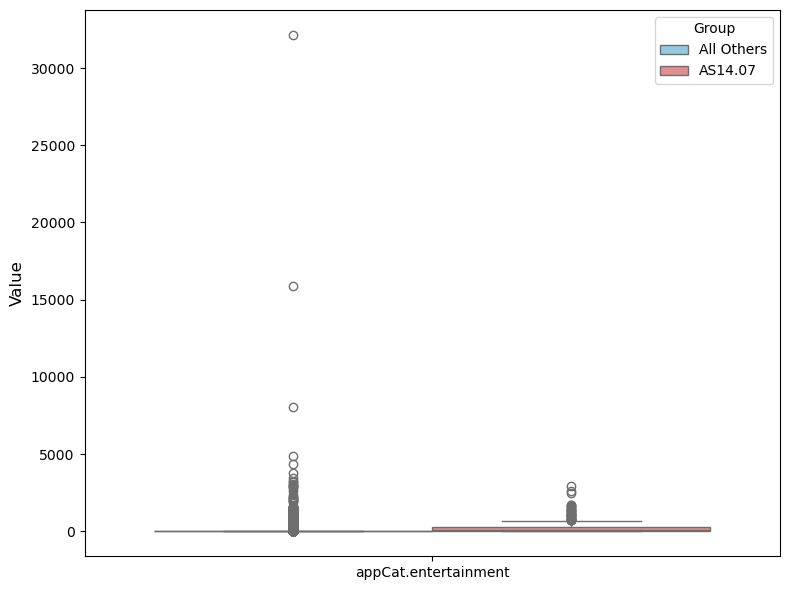

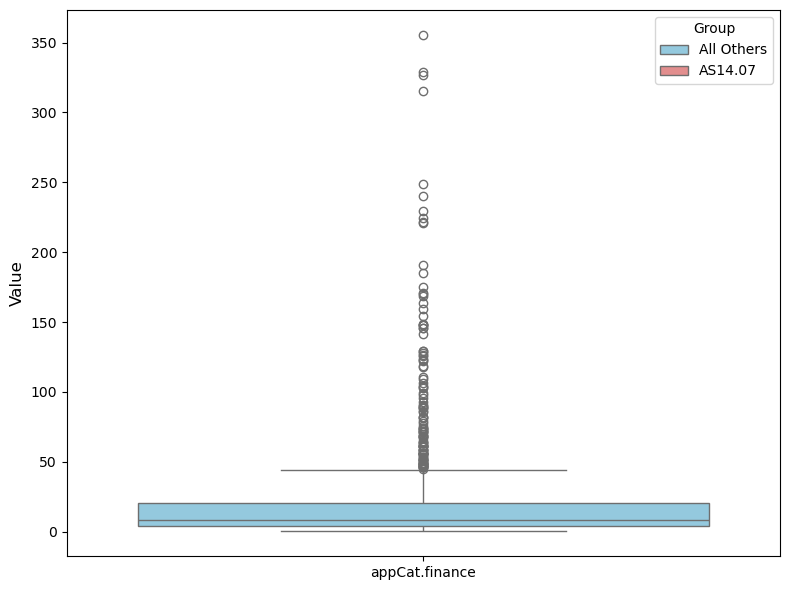

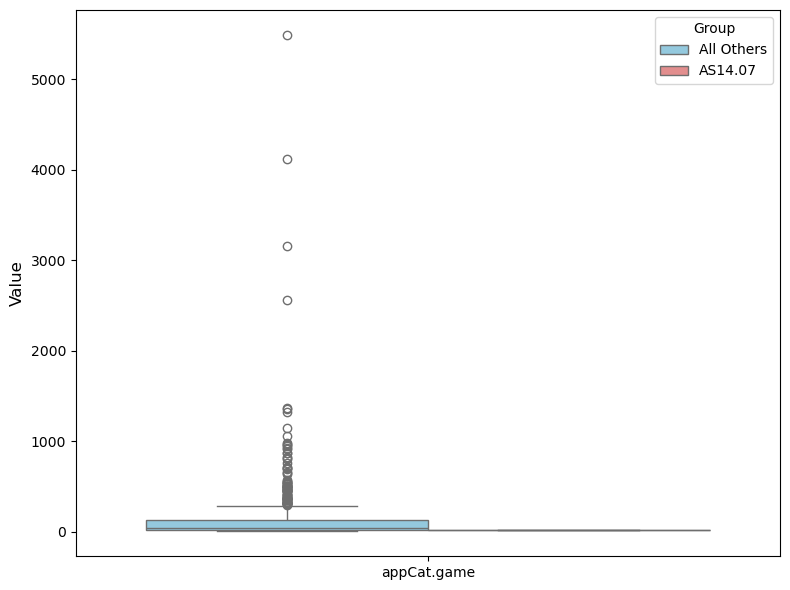

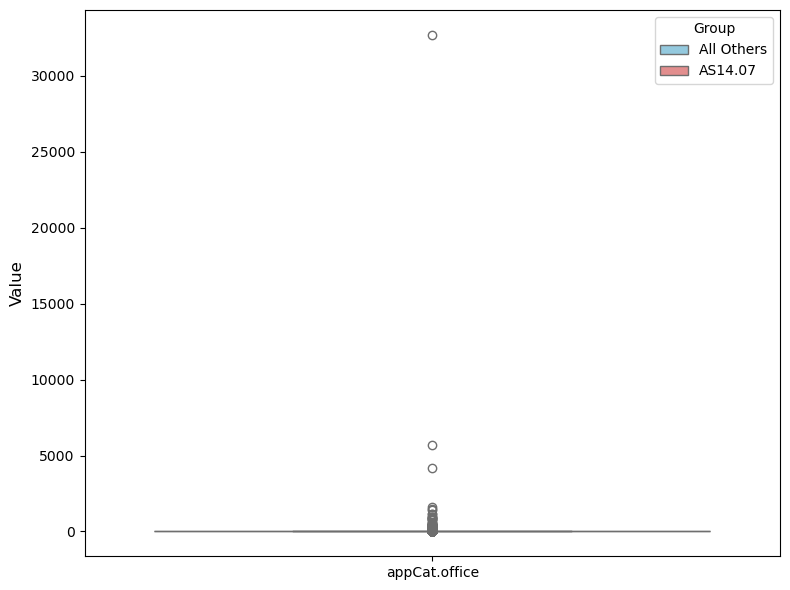

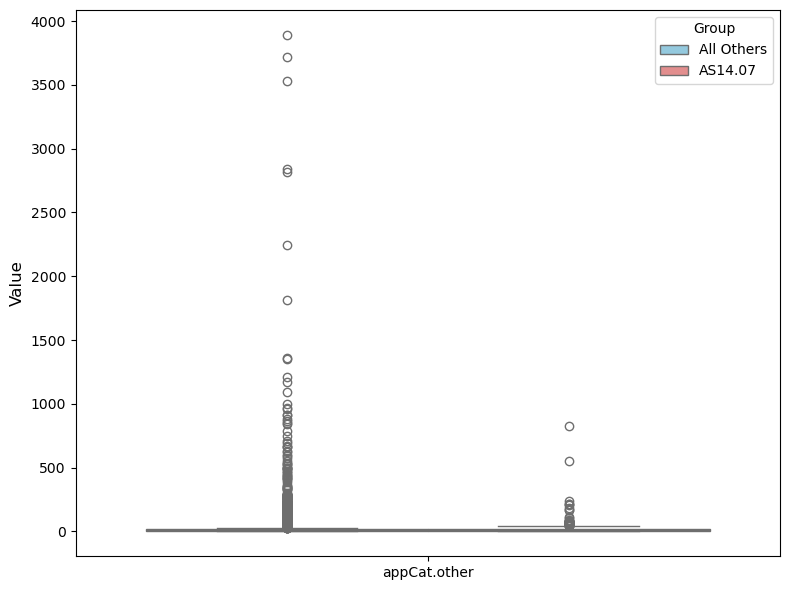

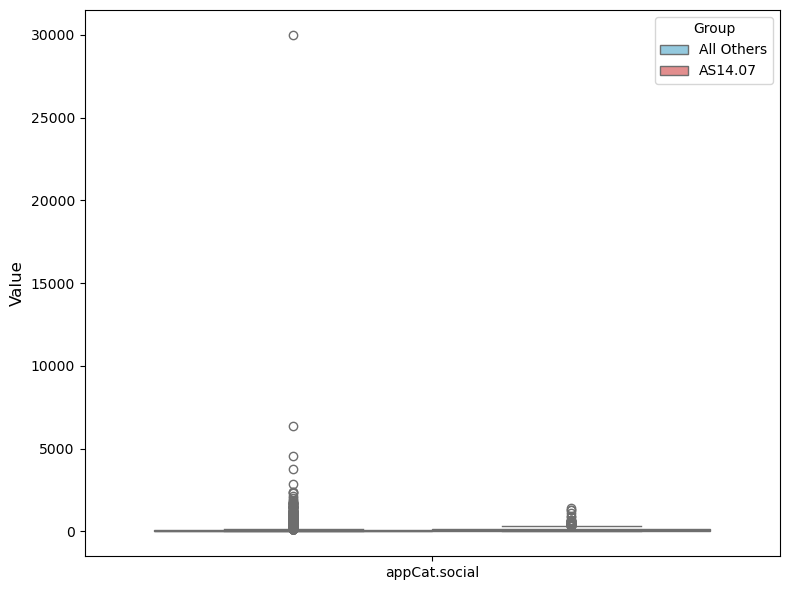

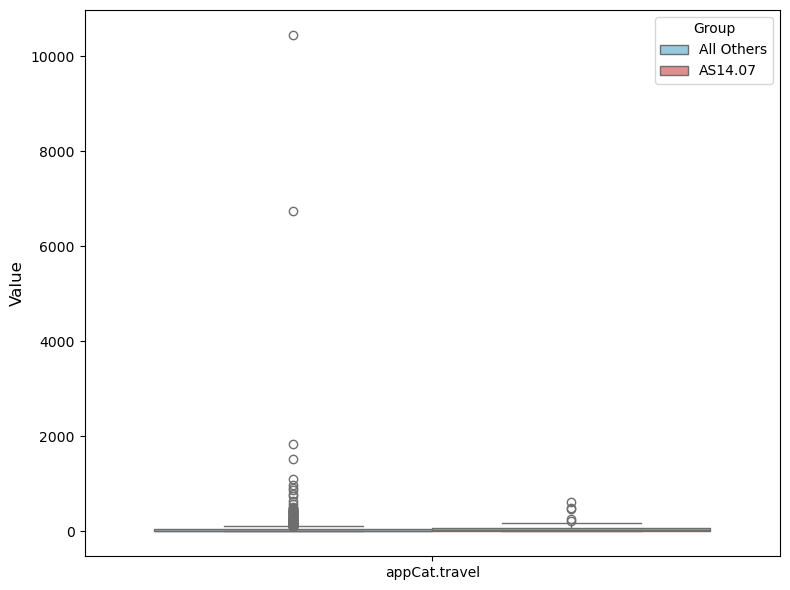

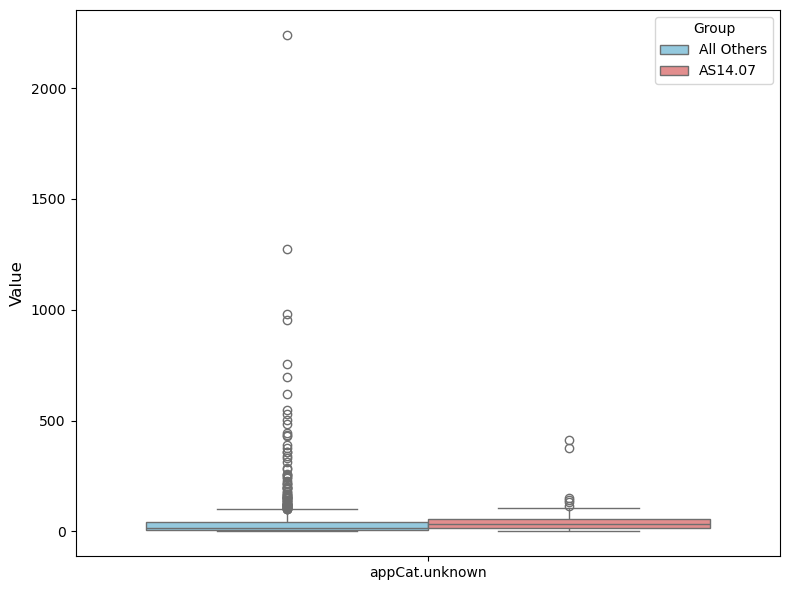

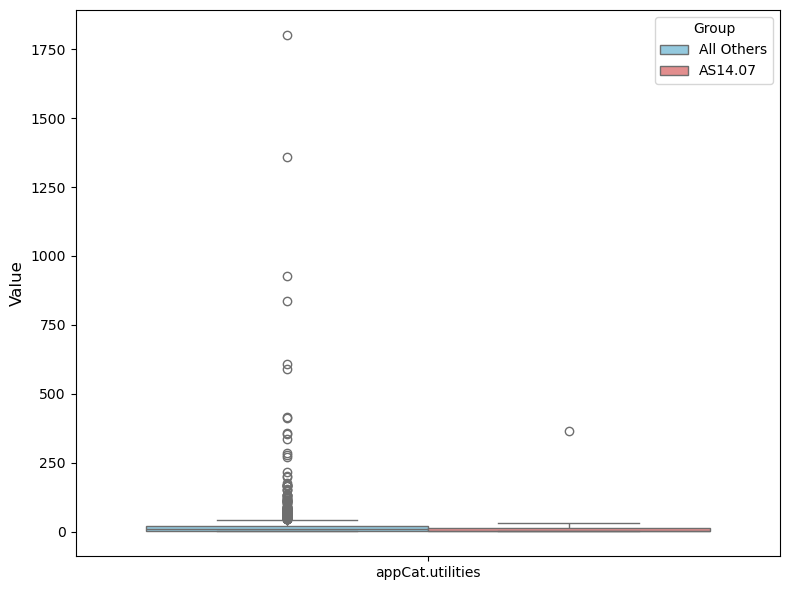

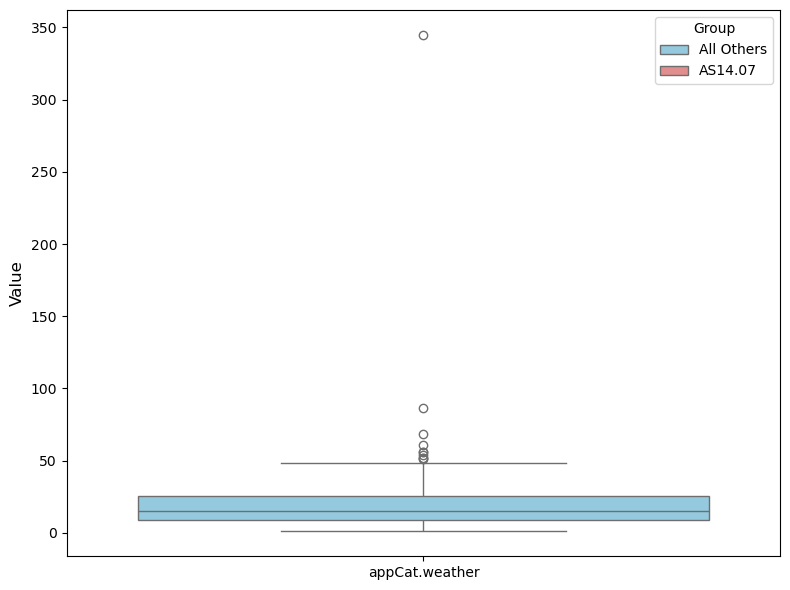

In [17]:
#create mean df of all other groups compared to sample 7 (id_to_remove)
test = rawdata.copy()
test['comparison_group'] = np.where(rawdata['id'] == id_to_remove,
                                         id_to_remove,
                                         'All Others')


unique_variables = test['variable'].unique()

for var in unique_variables:
   
    variable_data = test[test['variable'] == var].copy().reset_index(drop=True)
    if not test[test['comparison_group'] == id_to_remove].empty:   
        plt.figure(figsize=(8, 6)) 
        sns.boxplot(
            x='variable',          
            y='value',             
            hue='comparison_group',
            data=variable_data,
            palette={'All Others': 'skyblue', id_to_remove: 'lightcoral'}, 
            hue_order=['All Others', id_to_remove]
        )    
        plt.xlabel('')
        plt.ylabel('Value', fontsize=12)
        plt.legend(title='Group')
        plt.tight_layout()  
        plt.show()

In [18]:
mood = rawdata[rawdata['variable']=='mood']

In [19]:
rawdata['time']=pd.to_datetime(rawdata['time'])

In [45]:
rawdata_sorted = rawdata.sort_values(by='time')
rawdata_sorted['time'].min()


Timestamp('2014-02-17 07:00:52.197000')

In [49]:
rawdata_sorted['time'].max()

Timestamp('2014-06-09 00:00:00')

In [21]:
rawdata[rawdata['value'].isna()].variable.value_counts()

variable
circumplex.valence    156
circumplex.arousal     46
Name: count, dtype: int64

In [87]:
# get time stats of the samples or subjects
rawdata['time_dt'] = pd.to_datetime(rawdata['time'], format='%d-%m-%Y %H:%M:%S.%f', errors='coerce', dayfirst=True)
rawdata.dropna(subset=['time_dt'], inplace=True)

time_stats = rawdata.groupby('id')['time_dt'].agg(['min', 'max'])
time_stats['duration'] = time_stats['max'] - time_stats['min']

print(f"Minimum monitoring duration: {time_stats['duration'].min()}")
print(f"Maximum monitoring duration: {time_stats['duration'].max()}")
print(f"Average monitoring duration: {time_stats['duration'].mean()}")
print(f"Median monitoring duration: {time_stats['duration'].median()}")

       

Minimum monitoring duration: 48 days 22:56:13.599000
Maximum monitoring duration: 102 days 20:07:41.060000
Average monitoring duration: 78 days 18:05:30.326629630
Median monitoring duration: 77 days 06:02:43.687000


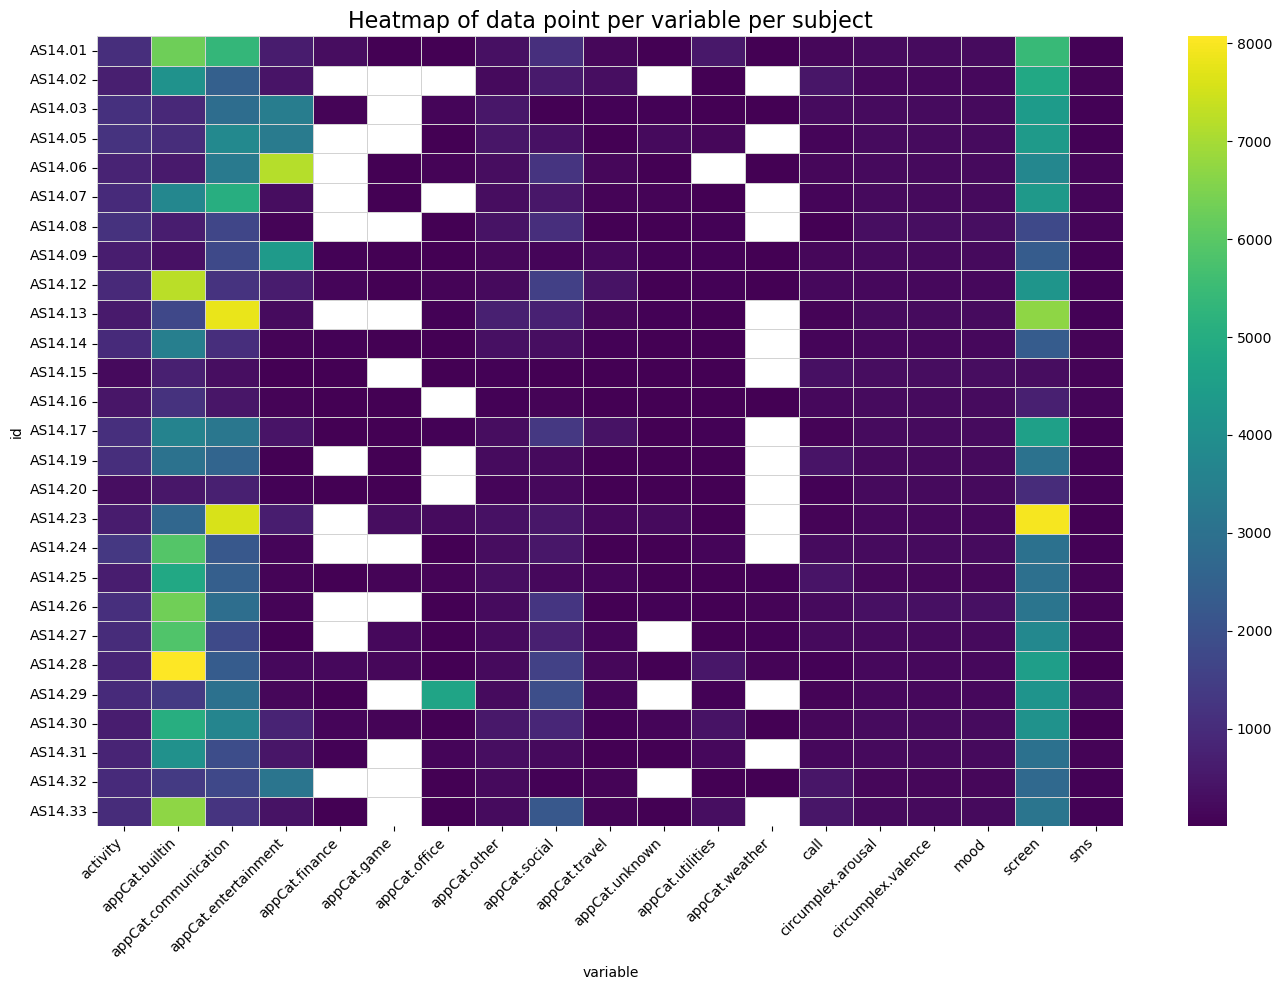

In [89]:
# making heatmap per sample per variable
counts_per_variable_subject = rawdata.groupby(['id', 'variable']).size()
counts_matrix = counts_per_variable_subject.unstack()

plt.figure(figsize=(14, 10))

sns.heatmap(
    counts_matrix,      
    cmap='viridis',                  
    linewidths=0.5,    
    linecolor='lightgray'
)


plt.title('Heatmap of data point per variable per subject', fontsize=16)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
#plt.savefig(os.path.join(base_folder, "Heatmap of data point per variable per subject_with_NA.png"))
plt.show()



In [137]:
rawdata[rawdata['variable'].str.startswith('appCat.') & (rawdata['value'] > 20000)]

,id,time,variable,value
163298,AS14.12,2014-04-09 02:42:21.210,appCat.builtin,27160.374
165330,AS14.12,2014-04-19 02:10:37.487,appCat.builtin,28163.993
172955,AS14.14,2014-04-08 23:34:57.855,appCat.builtin,33960.246
196457,AS14.26,2014-04-16 23:48:21.302,appCat.builtin,20556.690
204569,AS14.27,2014-04-20 23:13:11.269,appCat.builtin,31729.818
324731,AS14.09,2014-03-23 23:13:26.411,appCat.entertainment,32148.677
340707,AS14.29,2014-04-19 23:15:02.463,appCat.office,32708.818
360243,AS14.19,2014-04-21 01:10:07.884,appCat.social,30000.906


In [133]:
rawdata.groupby('variable')['value'].quantile(0.75).round(2)

variable
activity                  0.16
appCat.builtin            9.92
appCat.communication     45.48
appCat.entertainment     14.92
appCat.finance           20.16
appCat.game             123.62
appCat.office             8.04
appCat.other             16.83
appCat.social            75.37
appCat.travel            47.23
appCat.unknown           44.43
appCat.utilities         19.33
appCat.weather           25.35
call                      1.00
circumplex.arousal        1.00
circumplex.valence        1.00
mood                      8.00
screen                   62.54
sms                       1.00
Name: value, dtype: float64